In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import math
from scipy.stats import norm, skew

import warnings 
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('health care diabetes.csv')
df = dataset.copy() #Creating the copy of the dataframe 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df['Outcome'].nunique()

2

In [9]:
class_0 = df[df.Outcome ==0] # Outcome = 0 (i.e) Non-Diabetic Patient
class_1 = df[df.Outcome ==1] # Outcome = 1 (i.e) Diabetic Patient

Univariate Analysis

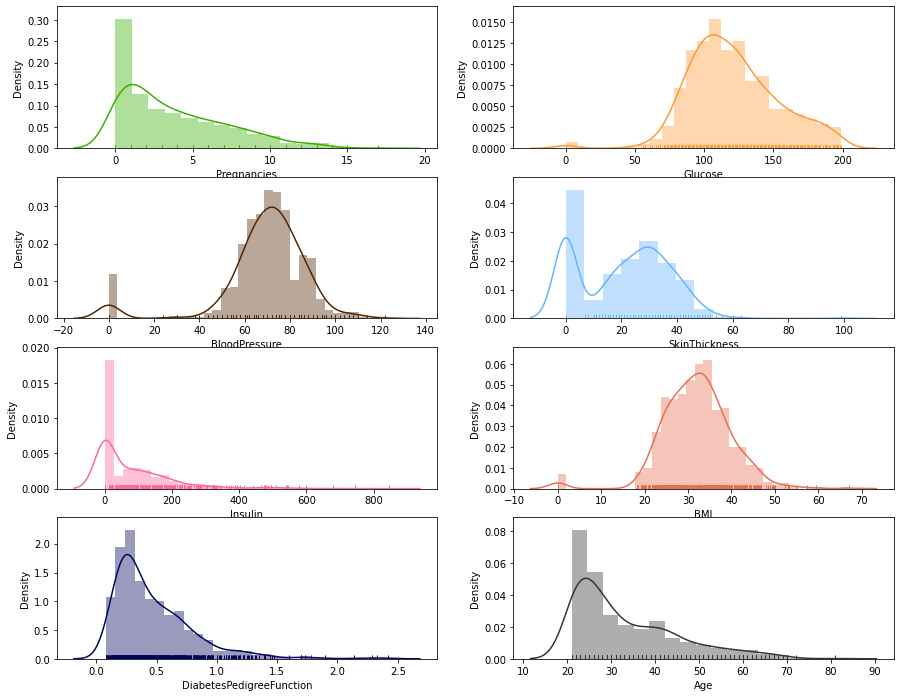

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(df['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(df['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(df['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(df['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(df['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(df['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(df['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

Here BMI, Blood Pressure, Glucose, Skin Thickness are almost Normally or Gaussian Distribution.

Here the Age, Insulin, Pregnancies, DiabetesPedigreeFunction the data is right skewed.

Some datas are loaded majorly on 0

IndexError: index 8 is out of bounds for axis 0 with size 8

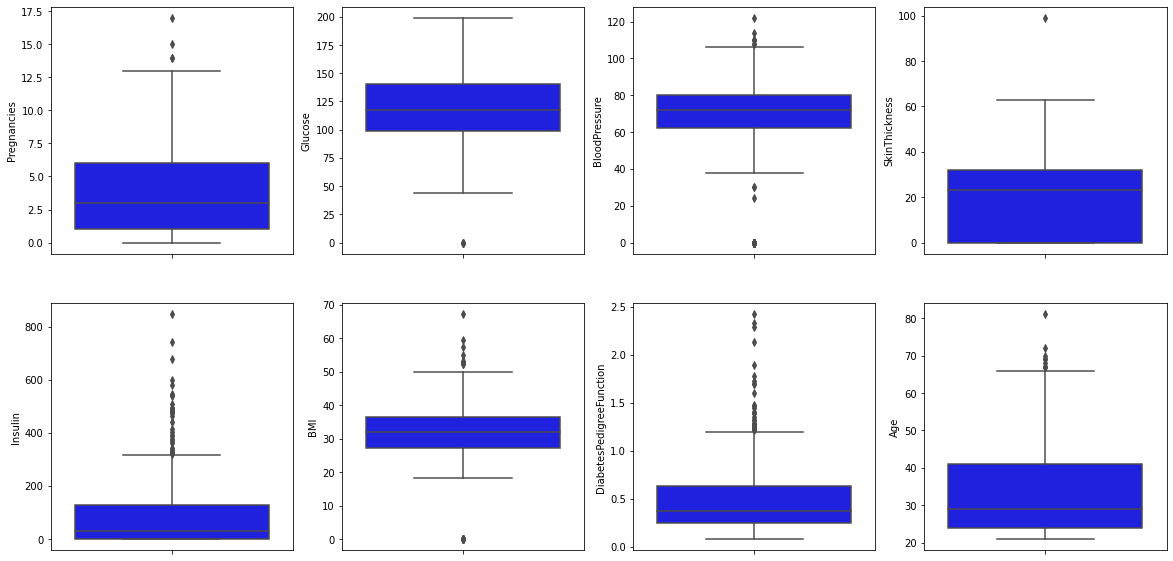

In [25]:
fig , ax = plt.subplots(nrows= 2,       # no,of plots comes in row wise 
                        ncols= 4,       # no,of plots comes in column wise 
                        figsize=(20,10) # size of plot
                        )
ax = ax.flatten() # It returns a flattened version of the array, to avoid numpy.ndarray
index = 0
for i in df.columns:
  sns.boxplot(y=i,data = df, ax=ax[index],color='blue')
  index += 1
plt.tight_layout(pad=0.4)

Multivaiate analysis

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

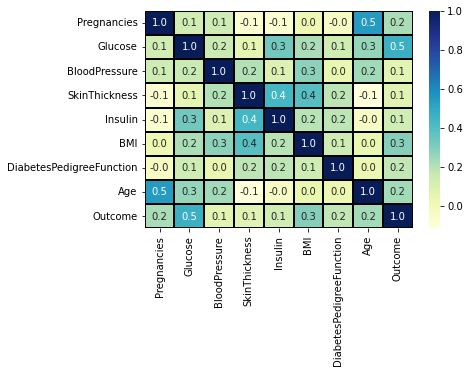

In [27]:
corr = df.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu"
            )

Here Gulcose has a strong relationship with Outcome

Age and Pregnancies have strong relationship : 0.5
Insulin and BMI have moderate relationship with SkinThickness

--------------------------------------------------------------------------------------------------------

Bivariate analysis

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

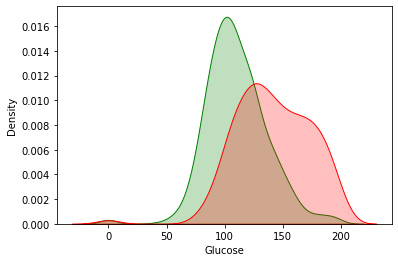

In [29]:
sns.kdeplot(class_0.Glucose, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.Glucose, shade=True,color="r") #diabetic

normal distribution for **non-diabetic**

curve looks abnormal for **diabetic** of the Outcome_1, here the datas are accumaleted in a wide pattern with some outliers at the bottom

<AxesSubplot:xlabel='Age', ylabel='Density'>

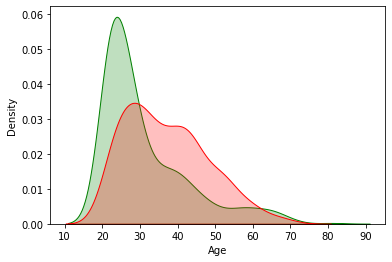

In [30]:
sns.kdeplot(class_0.Age, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.Age, shade=True,color="r") #diabetic

right skewed for **non-diabtic**

abnormal distribution for **diabetic**

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

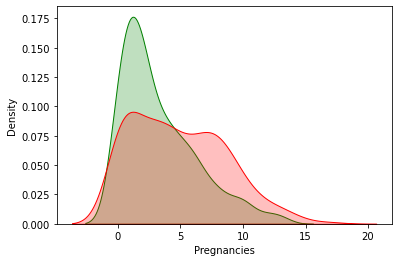

In [33]:
sns.kdeplot(class_0.Pregnancies, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.Pregnancies, shade=True,color="r") #diabetic

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

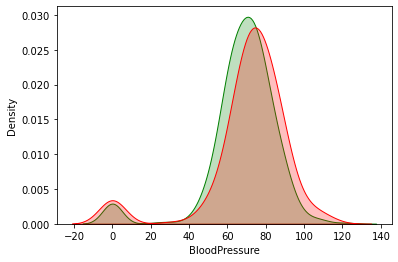

In [34]:
sns.kdeplot(class_0.BloodPressure, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.BloodPressure, shade=True,color="r") #diabetic

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

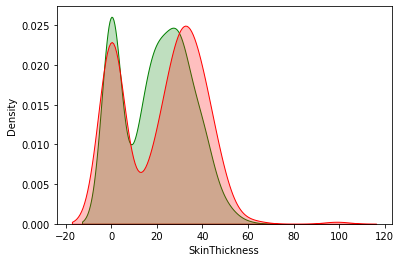

In [35]:
sns.kdeplot(class_0.SkinThickness, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.SkinThickness, shade=True,color="r") #diabetic

This will cause overfitting, as there are a lot of outliers here

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

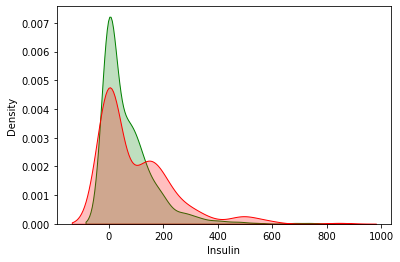

In [36]:
sns.kdeplot(class_0.Insulin, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.Insulin, shade=True,color="r") #diabetic

<AxesSubplot:xlabel='BMI', ylabel='Density'>

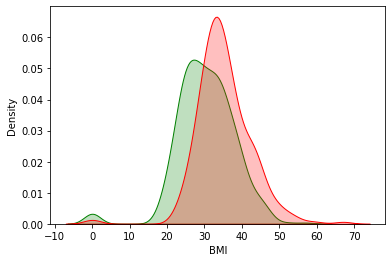

In [37]:
sns.kdeplot(class_0.BMI, shade=True,color="g") #non-diabetic
sns.kdeplot(class_0.BMI, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.BMI, shade=True,color="r") #diabeticsns.kdeplot(class_1.BMI, shade=True,color="r") #diabetic

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

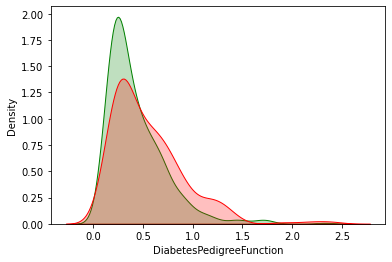

In [39]:
sns.kdeplot(class_0.DiabetesPedigreeFunction, shade=True,color="g") #non-diabetic
sns.kdeplot(class_1.DiabetesPedigreeFunction, shade=True,color="r") #diabetic

Pair plots

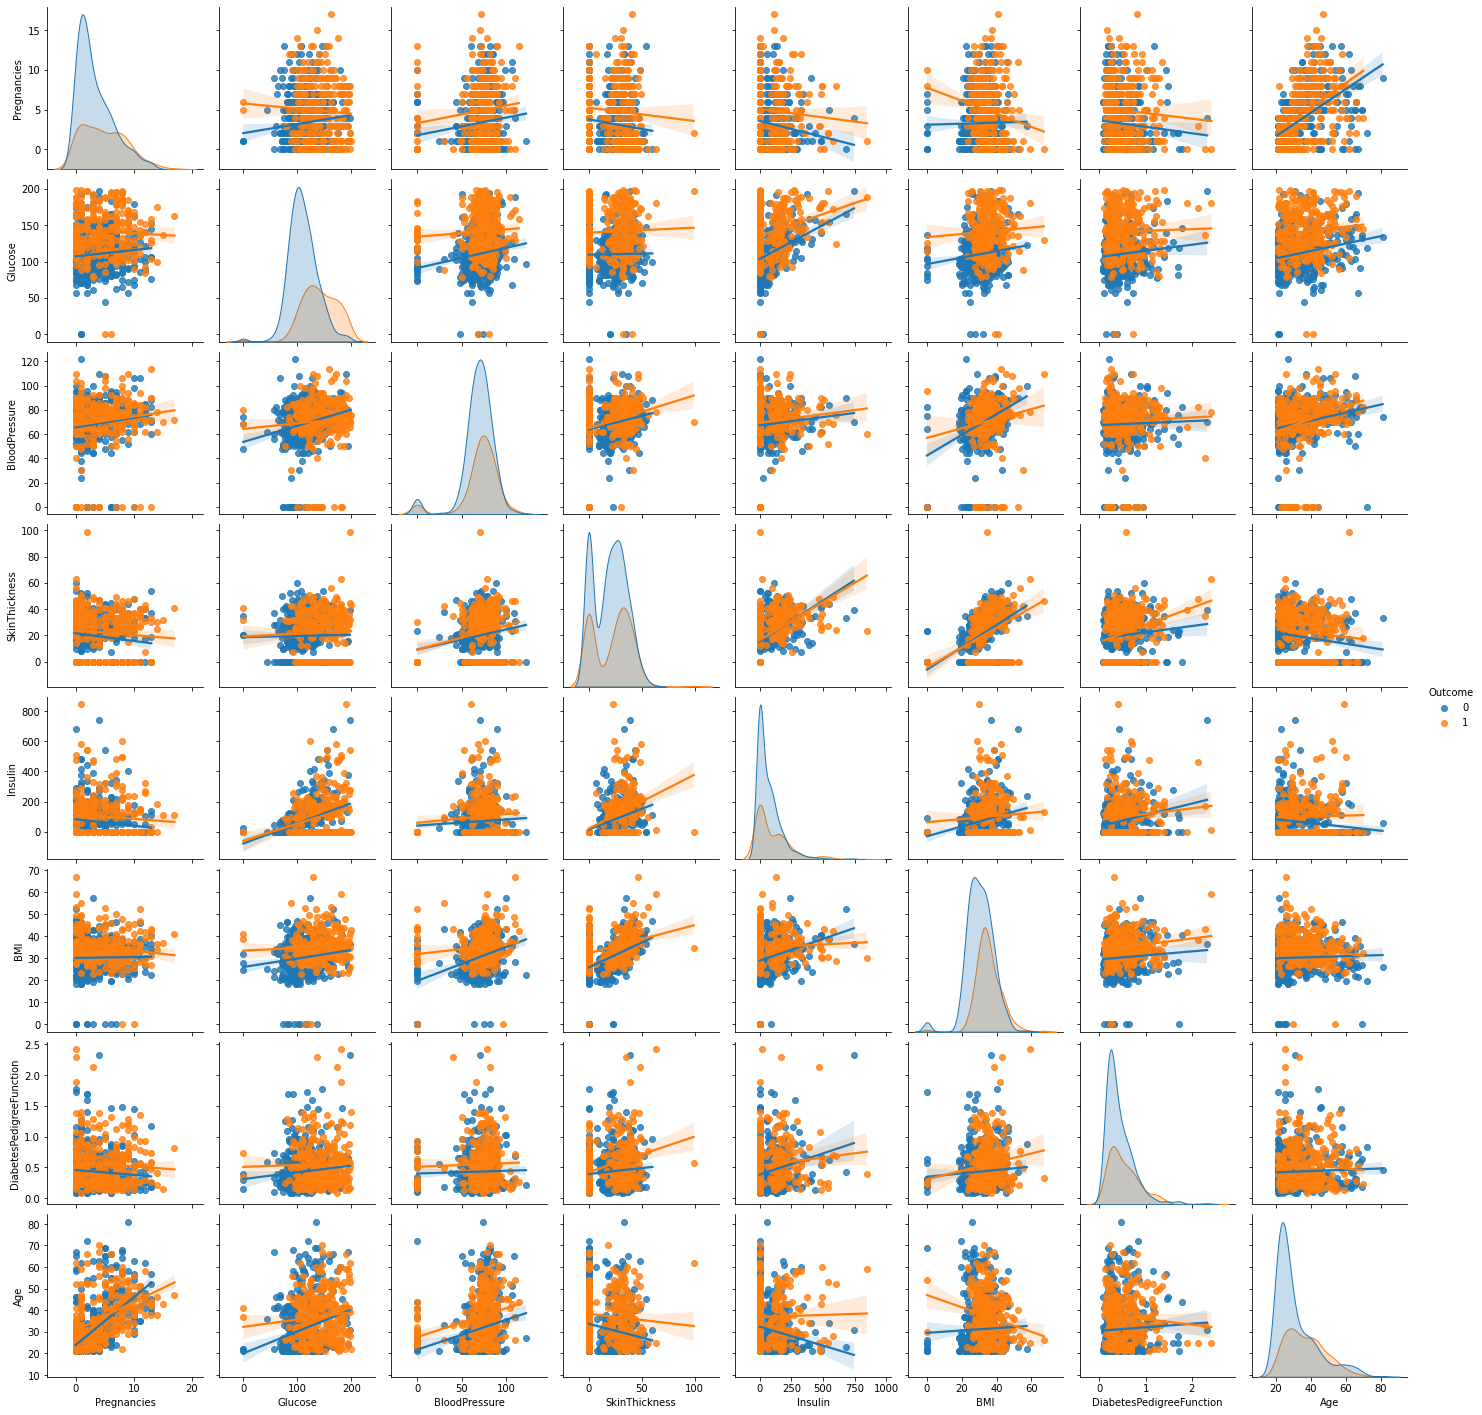

In [42]:
sns.pairplot(df,               # dataset
             hue='Outcome',    # variable in dataset to map plot aspects to different color
             kind = 'reg'      # kind of chart
             )

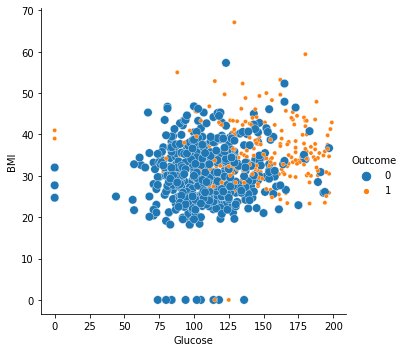

In [49]:
sns.relplot(x='Glucose',
            y='BMI',
            data = df,
            hue = 'Outcome',
            size='Outcome')

Higher BMI and Glucose level shows higher risk of diabetes(Outcome = 1)

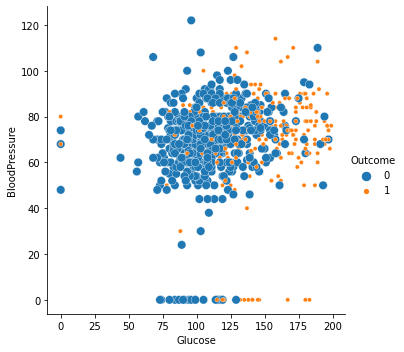

In [48]:
sns.relplot(x='Glucose',
            y='BloodPressure',
            data = df,
            hue = 'Outcome',
            size='Outcome')

Higher Glucose and BloodPressure level shows higher risk of diabetes(Outcome = 1)

**Using PyCaret**

In [1]:
from pycaret.classification import *

In [6]:
diab = setup(data= df, target= 'Outcome', normalize=True, session_id=1)

,Description,Value
0,session_id,1
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7504,0.7997,0.5360,0.6636,0.5904,0.4152,0.4212,0.4230
gbc,Gradient Boosting Classifier,0.7486,0.8013,0.5637,0.6605,0.6025,0.4218,0.4285,0.1160
ridge,Ridge Classifier,0.7467,0.0000,0.5088,0.6668,0.5738,0.4000,0.4087,0.0110
lda,Linear Discriminant Analysis,0.7448,0.7934,0.5143,0.6605,0.5749,0.3983,0.4061,0.0130
rf,Random Forest Classifier,0.7300,0.7968,0.4909,0.6407,0.5491,0.3631,0.3730,0.4780
lightgbm,Light Gradient Boosting Machine,0.7282,0.7914,0.5690,0.6160,0.5875,0.3866,0.3900,0.0520
ada,Ada Boost Classifier,0.7227,0.7879,0.5591,0.5979,0.5749,0.3710,0.3729,0.1020
knn,K Neighbors Classifier,0.7132,0.7247,0.4705,0.6055,0.5253,0.3258,0.3331,0.1240
et,Extra Trees Classifier,0.7114,0.7540,0.4371,0.6152,0.5087,0.3121,0.3230,0.4720
svm,SVM - Linear Kernel,0.6908,0.0000,0.5085,0.5436,0.5203,0.2955,0.2982,0.0120


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

------------------------------------------------------------------------------------------------

Trying Linear Regression, KNN and Gradient Boosting Classifier algorithms

In [8]:
lr = create_model('lr', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.6692,0.3684,0.6364,0.4667,0.2812,0.3013
1,0.7222,0.7654,0.5263,0.6250,0.5714,0.3682,0.3711
2,0.8148,0.8481,0.6316,0.8000,0.7059,0.5735,0.5820
3,0.7778,0.7978,0.6111,0.6875,0.6471,0.4857,0.4875
4,0.7778,0.8642,0.6111,0.6875,0.6471,0.4857,0.4875
5,0.7963,0.8611,0.6667,0.7059,0.6857,0.5352,0.5357
6,0.7037,0.7377,0.3889,0.5833,0.4667,0.2727,0.2835
7,0.7358,0.7651,0.5556,0.6250,0.5882,0.3948,0.3963
8,0.7358,0.8698,0.5000,0.6429,0.5625,0.3775,0.3836
9,0.7358,0.8190,0.5000,0.6429,0.5625,0.3775,0.3836


In [11]:
knn = create_model('knn', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6111,0.6850,0.3158,0.4286,0.3636,0.0928,0.0950
1,0.6667,0.6308,0.4737,0.5294,0.5000,0.2512,0.2520
2,0.7778,0.7962,0.5263,0.7692,0.6250,0.4749,0.4921
3,0.6852,0.6728,0.3889,0.5385,0.4516,0.2388,0.2450
4,0.7778,0.7724,0.6111,0.6875,0.6471,0.4857,0.4875
5,0.7778,0.8804,0.6111,0.6875,0.6471,0.4857,0.4875
6,0.6852,0.5610,0.2778,0.5556,0.3704,0.1905,0.2108
7,0.7170,0.7627,0.4444,0.6154,0.5161,0.3234,0.3320
8,0.7925,0.8706,0.5556,0.7692,0.6452,0.5038,0.5172
9,0.6415,0.6151,0.5000,0.4737,0.4865,0.2114,0.2116


In [18]:
gbc = create_model('gbc', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6296,0.6496,0.3158,0.4615,0.3750,0.1248,0.1293
1,0.7407,0.7564,0.6316,0.6316,0.6316,0.4316,0.4316
2,0.8148,0.8000,0.5789,0.8462,0.6875,0.5624,0.5828
3,0.7037,0.7840,0.6667,0.5455,0.6000,0.3684,0.3731
4,0.8148,0.8951,0.7222,0.7222,0.7222,0.5833,0.5833
5,0.8148,0.9275,0.6111,0.7857,0.6875,0.5588,0.5677
6,0.7407,0.8025,0.4444,0.6667,0.5333,0.3636,0.3780
7,0.7547,0.8159,0.6111,0.6471,0.6286,0.4457,0.4461
8,0.7925,0.8476,0.5556,0.7692,0.6452,0.5038,0.5172
9,0.6792,0.7349,0.5000,0.5294,0.5143,0.2751,0.2754


Tuning all algorithms

In [12]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.6451,0.3684,0.6364,0.4667,0.2812,0.3013
1,0.6852,0.7203,0.4737,0.5625,0.5143,0.2839,0.2862
2,0.7963,0.8662,0.4737,0.9000,0.6207,0.4992,0.5472
3,0.6852,0.7253,0.3889,0.5385,0.4516,0.2388,0.2450
4,0.7778,0.8056,0.5000,0.7500,0.6000,0.4545,0.4725
5,0.8519,0.9120,0.6667,0.8571,0.7500,0.6471,0.6574
6,0.6852,0.7330,0.2778,0.5556,0.3704,0.1905,0.2108
7,0.7358,0.7762,0.5000,0.6429,0.5625,0.3775,0.3836
8,0.7925,0.8841,0.5000,0.8182,0.6207,0.4890,0.5171
9,0.7358,0.7667,0.3889,0.7000,0.5000,0.3399,0.3670


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.6767,0.3684,0.6364,0.4667,0.2812,0.3013
1,0.7593,0.7820,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.8519,0.8722,0.5789,1.0000,0.7333,0.6406,0.6865
3,0.7963,0.8025,0.6111,0.7333,0.6667,0.5217,0.5262
4,0.7778,0.8657,0.6111,0.6875,0.6471,0.4857,0.4875
5,0.7963,0.8688,0.6111,0.7333,0.6667,0.5217,0.5262
6,0.7407,0.7546,0.3889,0.7000,0.5000,0.3438,0.3708
7,0.7358,0.7683,0.5556,0.6250,0.5882,0.3948,0.3963
8,0.7547,0.8667,0.5000,0.6923,0.5806,0.4136,0.4246
9,0.7736,0.8159,0.5556,0.7143,0.6250,0.4664,0.4740


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Initializing CV
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:49:59
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [19]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6481,0.6541,0.3158,0.5000,0.3871,0.1576,0.1658
1,0.6852,0.7368,0.4737,0.5625,0.5143,0.2839,0.2862
2,0.7963,0.8105,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.6481,0.7577,0.5556,0.4762,0.5128,0.2400,0.2417
4,0.7407,0.8642,0.5000,0.6429,0.5625,0.3824,0.3884
5,0.8333,0.9105,0.7222,0.7647,0.7429,0.6197,0.6203
6,0.7407,0.7623,0.3889,0.7000,0.5000,0.3438,0.3708
7,0.7736,0.8206,0.6111,0.6875,0.6471,0.4812,0.4830
8,0.8302,0.8714,0.6667,0.8000,0.7273,0.6055,0.6108
9,0.7170,0.7381,0.4444,0.6154,0.5161,0.3234,0.3320


As seen above, GBC provides the highest accuracy, recall, precision

In [20]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


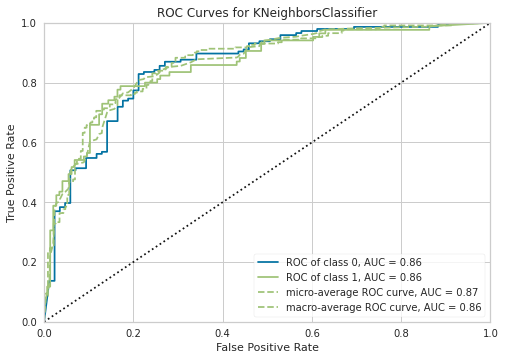

In [14]:
plot_model(tuned_knn, plot= 'auc') 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


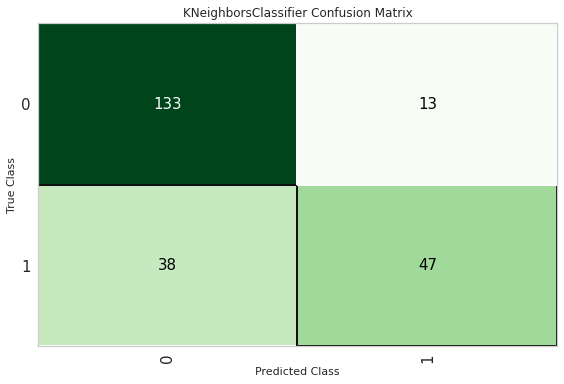

In [15]:
plot_model(tuned_knn, plot= 'confusion_matrix')

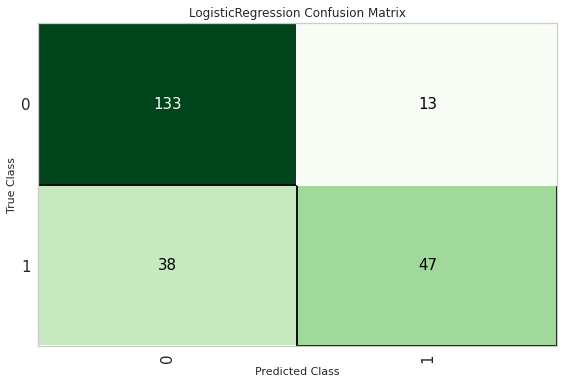

In [17]:
plot_model(tuned_lr, plot= 'confusion_matrix')

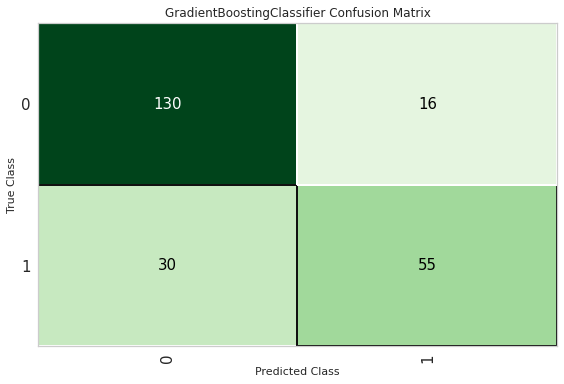

In [21]:
plot_model(tuned_gbc, plot= 'confusion_matrix')

In [31]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8009,0.8604,0.6471,0.7746,0.7051,0.5566,0.5618


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_10,...,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Outcome,Label,Score
0,0.480473,0.251212,0.405070,0.510602,-0.761478,0.537344,1.479301,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5474
1,0.961005,-0.445435,-1.225722,-0.688222,-0.748437,-0.868783,-0.946173,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9756
2,-0.384485,-0.445435,0.467793,-0.688222,-0.891893,-0.787661,-0.527988,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9411
3,-1.922189,0.649296,0.530515,-0.688222,0.334002,-0.676492,1.061116,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6941
4,-0.160237,0.450254,0.593238,0.910210,0.555705,0.083657,-0.695262,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.961124,0.052170,0.781406,0.093234,0.164463,-0.066570,-0.946173,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9493
227,-0.384485,-1.540166,-0.096712,0.377399,-1.139680,-0.183747,-0.611625,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9802
228,-0.961124,-0.743998,0.342347,0.199796,-0.865810,-0.703533,-0.862536,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9891
229,1.505608,0.251212,-1.225722,-0.688222,0.803493,0.206844,0.057471,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7504


Gradient Boosting Classifier gives a reasonably well accuracy of close to 82.68%

In [1]:
pip install pandoc

You should consider upgrading via the 'c:\svam\python\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for pandoc, since package 'wheel' is not installed.
    Running setup.py install for pandoc: started
    Running setup.py install for pandoc: finished with status 'done'
